# Data Collection

### collect dataset from : https://www.kaggle.com/code/kabure/predicting-credit-risk-model-pipeline/input?select=german_credit_data.csv

# Data Preprocessing

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("german_credit_data.csv")

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.shape

(1000, 11)

In [5]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
# there are null values here, let's clean them  using Random Sample Technique

s=data["Saving accounts"].dropna().sample(183)

In [9]:
s

127        little
797        little
581        little
6      quite rich
734        little
          ...    
459        little
3          little
904        little
915        little
349          rich
Name: Saving accounts, Length: 183, dtype: object

In [10]:
s.index

Int64Index([127, 797, 581,   6, 734, 917, 790, 506, 418, 390,
            ...
            353, 672, 143, 641, 648, 459,   3, 904, 915, 349],
           dtype='int64', length=183)

In [11]:
# now let's collect indexes from null values
x=data[data["Saving accounts"].isnull()]

In [12]:
x

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
17,17,25,male,2,own,NaN,little,8072,30,business,good
24,24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...
968,968,29,male,2,rent,NaN,NaN,7166,42,radio/TV,good
977,977,42,male,2,own,NaN,moderate,2427,18,business,good
990,990,37,male,1,own,NaN,NaN,3565,12,education,good
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV,good


In [14]:
data["Saving accounts_replaced"]=data["Saving accounts"].copy()
s=data["Saving accounts"].dropna().sample(data["Saving accounts"].isnull().sum(),random_state=42)
s.index=data[data["Saving accounts"].isnull()].index
data.loc[data["Saving accounts"].isnull(),"Saving accounts_replaced"]=s

In [15]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,moderate
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,little
2,2,49,male,1,own,little,NaN,2096,12,education,good,little
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,little
4,4,53,male,2,free,little,little,4870,24,car,bad,little


In [16]:
data.isnull().sum()

Unnamed: 0                    0
Age                           0
Sex                           0
Job                           0
Housing                       0
Saving accounts             183
Checking account            394
Credit amount                 0
Duration                      0
Purpose                       0
Risk                          0
Saving accounts_replaced      0
dtype: int64

In [18]:
# let's do the same process for column checking account also
data["Checking account_replaced"]=data["Checking account"].copy()
s=data["Checking account"].dropna().sample(data["Checking account"].isnull().sum(),random_state=42)
s.index=data[data["Checking account"].isnull()].index
data.loc[data["Checking account"].isnull(),"Checking account_replaced"]=s

In [19]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,moderate,little
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,little,moderate
2,2,49,male,1,own,little,NaN,2096,12,education,good,little,little
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,little,little
4,4,53,male,2,free,little,little,4870,24,car,bad,little,little


In [20]:
data.isnull().sum()

Unnamed: 0                     0
Age                            0
Sex                            0
Job                            0
Housing                        0
Saving accounts              183
Checking account             394
Credit amount                  0
Duration                       0
Purpose                        0
Risk                           0
Saving accounts_replaced       0
Checking account_replaced      0
dtype: int64

In [21]:
# now drop original columns
data.drop(columns=["Checking account","Saving accounts"],axis=1,inplace=True)

In [22]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate
2,2,49,male,1,own,2096,12,education,good,little,little
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little
4,4,53,male,2,free,4870,24,car,bad,little,little


In [23]:
data.isnull().sum()

Unnamed: 0                   0
Age                          0
Sex                          0
Job                          0
Housing                      0
Credit amount                0
Duration                     0
Purpose                      0
Risk                         0
Saving accounts_replaced     0
Checking account_replaced    0
dtype: int64

In [24]:
# here there are no null values left

In [25]:
# let's check the type of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 1000 non-null   int64 
 1   Age                        1000 non-null   int64 
 2   Sex                        1000 non-null   object
 3   Job                        1000 non-null   int64 
 4   Housing                    1000 non-null   object
 5   Credit amount              1000 non-null   int64 
 6   Duration                   1000 non-null   int64 
 7   Purpose                    1000 non-null   object
 8   Risk                       1000 non-null   object
 9   Saving accounts_replaced   1000 non-null   object
 10  Checking account_replaced  1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [27]:
# here so many columns are object type , we need to convert them into numerical

# Let's check unique values in columns Sex

data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [28]:
# here there are 2 unique values for Sex that are male and female , let's transform the Sex column using one hot encoding

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categories="auto",drop="first",sparse=False,handle_unknown="error")

In [29]:
ohe.fit(data["Sex"].values.reshape(-1,1))

OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [30]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [31]:
c=ohe.transform(data["Sex"].values.reshape(-1,1))


In [32]:
c

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

In [33]:
c=pd.DataFrame(c)

In [34]:
c

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
995,0.0
996,1.0
997,1.0
998,1.0


In [36]:
ohe.get_feature_names_out()

array(['x0_male'], dtype=object)

In [37]:
# 1 for male  and 0 for female
data["Sex_replaced"]=c

In [38]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced,Sex_replaced
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little,1.0
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate,0.0
2,2,49,male,1,own,2096,12,education,good,little,little,1.0
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little,1.0
4,4,53,male,2,free,4870,24,car,bad,little,little,1.0


In [39]:
# now try for next categorical column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1000 non-null   int64  
 1   Age                        1000 non-null   int64  
 2   Sex                        1000 non-null   object 
 3   Job                        1000 non-null   int64  
 4   Housing                    1000 non-null   object 
 5   Credit amount              1000 non-null   int64  
 6   Duration                   1000 non-null   int64  
 7   Purpose                    1000 non-null   object 
 8   Risk                       1000 non-null   object 
 9   Saving accounts_replaced   1000 non-null   object 
 10  Checking account_replaced  1000 non-null   object 
 11  Sex_replaced               1000 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [41]:
# now Housing column is categorical column, let's check the unique values here
data["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [42]:
# here there are 3 labels and apply ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
reg=OrdinalEncoder()

In [43]:
reg.fit(data[["Housing"]])


OrdinalEncoder()

In [44]:
sol=reg.transform(data[["Housing"]])

In [45]:
sol

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

In [47]:
reg.categories_  

[array(['free', 'own', 'rent'], dtype=object)]

In [49]:
reg.get_feature_names_out()

array(['Housing'], dtype=object)

In [50]:
# here 0- free , 1- own , 2- rent

In [51]:
sol=pd.DataFrame(sol)

In [52]:
data["Housing_replaced"]=sol

In [53]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced,Sex_replaced,Housing_replaced
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little,1.0,1.0
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate,0.0,1.0
2,2,49,male,1,own,2096,12,education,good,little,little,1.0,1.0
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little,1.0,0.0
4,4,53,male,2,free,4870,24,car,bad,little,little,1.0,0.0


In [56]:
# first convert the Risk column into numerical using label encoding 
from sklearn.preprocessing import LabelEncoder
reg=LabelEncoder()

In [57]:
reg.fit(data["Risk"])

LabelEncoder()

In [58]:
sol=reg.transform(data["Risk"])

In [59]:
sol=pd.DataFrame(sol)

In [62]:
sol

,0
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [63]:
data["Risk_new"]=sol    

In [65]:
data.head()   # good=1 , bad=0 for risk

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced,Sex_replaced,Housing_replaced,Risk_new
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little,1.0,1.0,1
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate,0.0,1.0,0
2,2,49,male,1,own,2096,12,education,good,little,little,1.0,1.0,1
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little,1.0,0.0,1
4,4,53,male,2,free,4870,24,car,bad,little,little,1.0,0.0,0


In [54]:
# now let's consider purpose column
data["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [66]:
# convert the column to numerical using 
value=data.groupby(["Purpose"])["Risk_new"].mean().sort_values(ascending=True).index

In [67]:
value

Index(['vacation/others', 'education', 'repairs', 'business',
       'domestic appliances', 'furniture/equipment', 'car', 'radio/TV'],
      dtype='object', name='Purpose')

In [68]:
sol={j:i for i,j in enumerate(value,0)}

In [69]:
sol

{'vacation/others': 0,
 'education': 1,
 'repairs': 2,
 'business': 3,
 'domestic appliances': 4,
 'furniture/equipment': 5,
 'car': 6,
 'radio/TV': 7}

In [70]:
data["Purpose_new"]=data["Purpose"].map(sol)

In [71]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced,Sex_replaced,Housing_replaced,Risk_new,Purpose_new
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little,1.0,1.0,1,7
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate,0.0,1.0,0,7
2,2,49,male,1,own,2096,12,education,good,little,little,1.0,1.0,1,1
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little,1.0,0.0,1,5
4,4,53,male,2,free,4870,24,car,bad,little,little,1.0,0.0,0,6


In [72]:
# now let's convert the column Saving accounts replaced
data["Saving accounts_replaced"].unique()

array(['moderate', 'little', 'quite rich', 'rich'], dtype=object)

In [74]:
# this column like ordering , so use ordinal encoding
ohe=OrdinalEncoder()
ohe.fit(data["Saving accounts_replaced"].values.reshape(-1,1))
sol=ohe.transform(data["Saving accounts_replaced"].values.reshape(-1,1))

In [75]:
sol

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [76]:
sol=pd.DataFrame(sol)

In [77]:
data["Saving accounts_replaced_new"]=sol

In [78]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced,Sex_replaced,Housing_replaced,Risk_new,Purpose_new,Saving accounts_replaced_new
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little,1.0,1.0,1,7,1.0
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate,0.0,1.0,0,7,0.0
2,2,49,male,1,own,2096,12,education,good,little,little,1.0,1.0,1,1,0.0
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little,1.0,0.0,1,5,0.0
4,4,53,male,2,free,4870,24,car,bad,little,little,1.0,0.0,0,6,0.0


In [79]:
# now let's do the same process for column checking account replaced
data["Checking account_replaced"].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [80]:
# this column labels are like ordering , so use ordinal encoding

ohe=OrdinalEncoder()
ohe.fit(data["Checking account_replaced"].values.reshape(-1,1))
sol=ohe.transform(data["Checking account_replaced"].values.reshape(-1,1))
sol

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [81]:
sol=pd.DataFrame(sol)

In [82]:
data["Checking account_new"]=sol

In [83]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_replaced,Checking account_replaced,Sex_replaced,Housing_replaced,Risk_new,Purpose_new,Saving accounts_replaced_new,Checking account_new
0,0,67,male,2,own,1169,6,radio/TV,good,moderate,little,1.0,1.0,1,7,1.0,0.0
1,1,22,female,2,own,5951,48,radio/TV,bad,little,moderate,0.0,1.0,0,7,0.0,1.0
2,2,49,male,1,own,2096,12,education,good,little,little,1.0,1.0,1,1,0.0,0.0
3,3,45,male,2,free,7882,42,furniture/equipment,good,little,little,1.0,0.0,1,5,0.0,0.0
4,4,53,male,2,free,4870,24,car,bad,little,little,1.0,0.0,0,6,0.0,0.0


In [84]:
# here we transformed all categorical columns as numerical columns, now remove the original columns
data.drop(columns=["Sex","Housing","Purpose","Risk","Saving accounts_replaced","Checking account_replaced"],axis=1,inplace=True)

In [85]:
data.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Risk_new,Purpose_new,Saving accounts_replaced_new,Checking account_new
0,0,67,2,1169,6,1.0,1.0,1,7,1.0,0.0
1,1,22,2,5951,48,0.0,1.0,0,7,0.0,1.0
2,2,49,1,2096,12,1.0,1.0,1,1,0.0,0.0
3,3,45,2,7882,42,1.0,0.0,1,5,0.0,0.0
4,4,53,2,4870,24,1.0,0.0,0,6,0.0,0.0


In [89]:
# remove the unnamed column
data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [90]:
data.head()

,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Risk_new,Purpose_new,Saving accounts_replaced_new,Checking account_new
0,67,2,1169,6,1.0,1.0,1,7,1.0,0.0
1,22,2,5951,48,0.0,1.0,0,7,0.0,1.0
2,49,1,2096,12,1.0,1.0,1,1,0.0,0.0
3,45,2,7882,42,1.0,0.0,1,5,0.0,0.0
4,53,2,4870,24,1.0,0.0,0,6,0.0,0.0


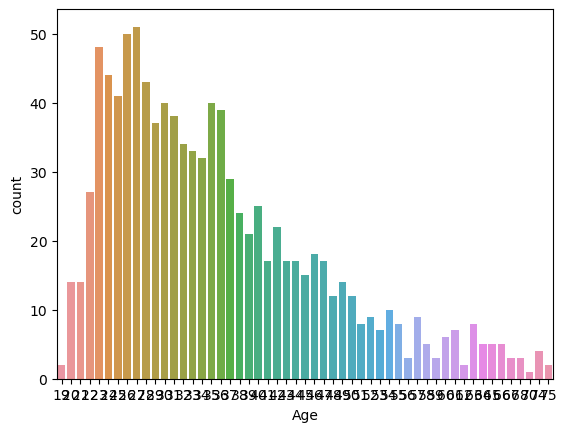

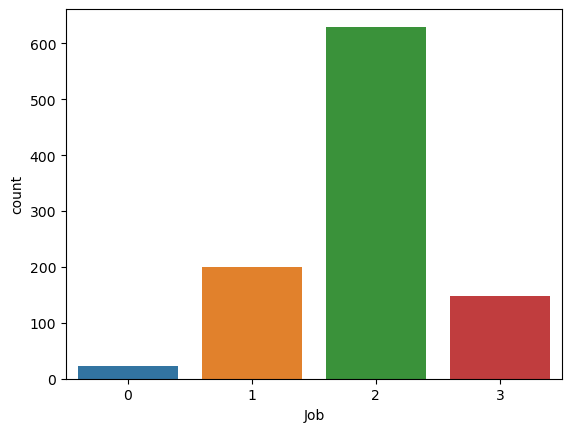

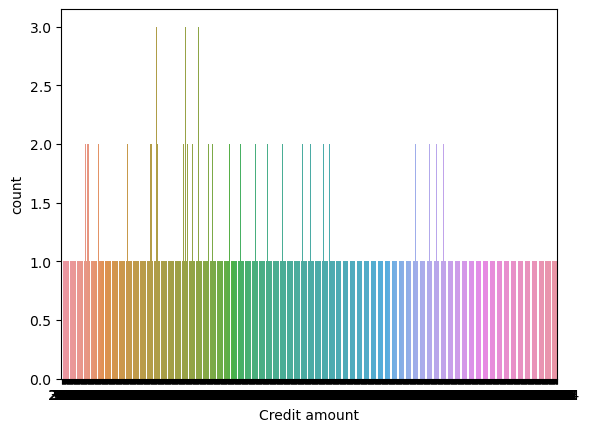

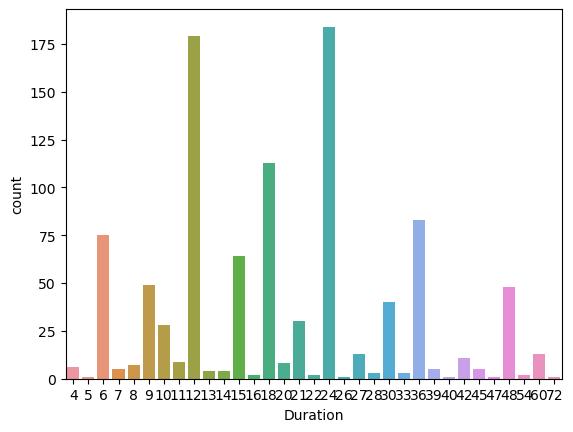

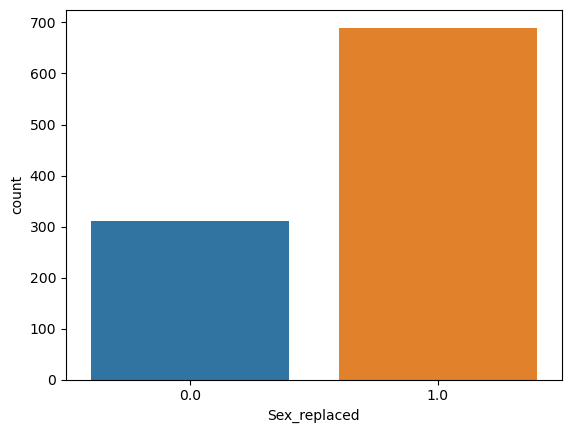

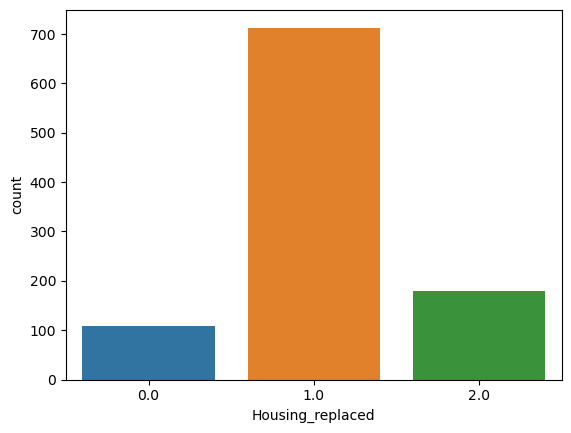

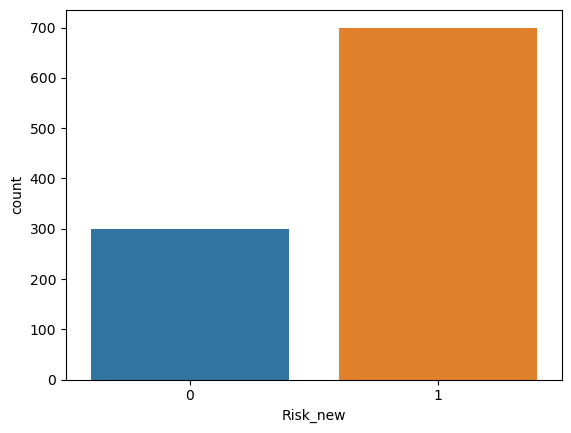

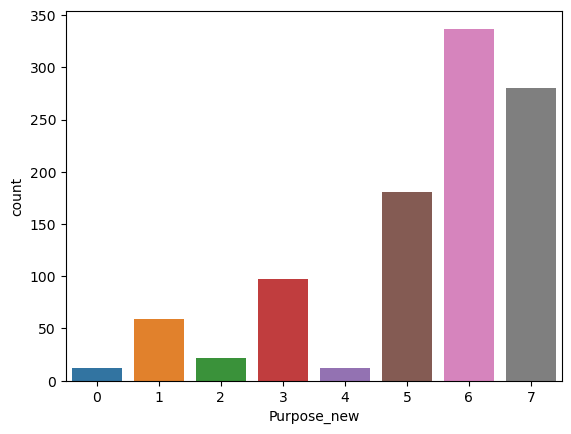

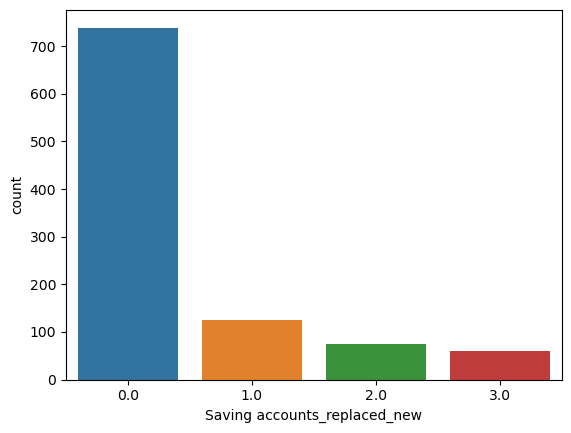

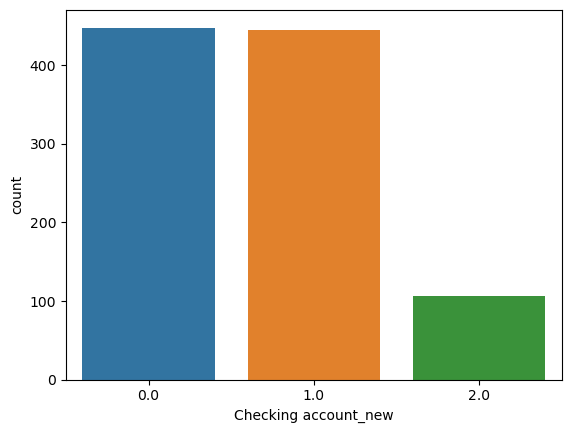

In [95]:
for i in data.columns:
    sns.countplot(data[i])
    plt.show()

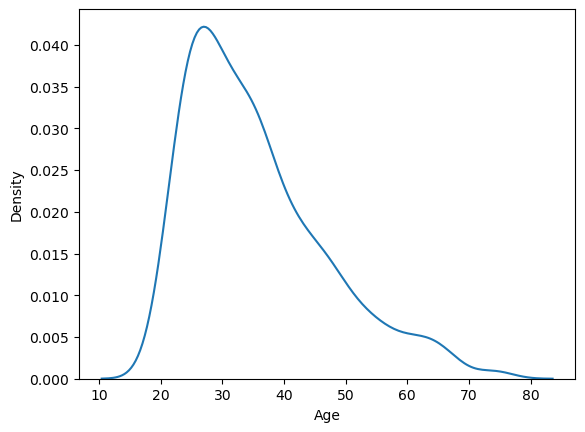

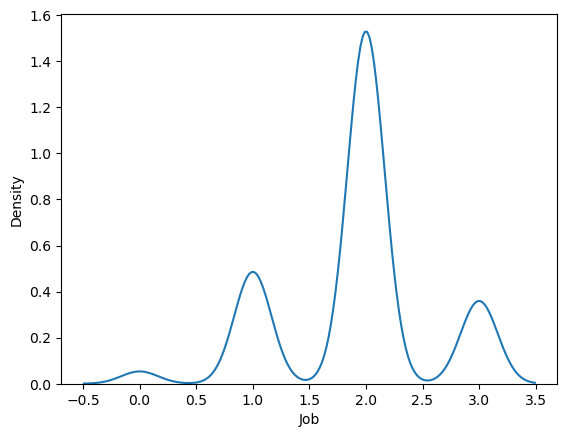

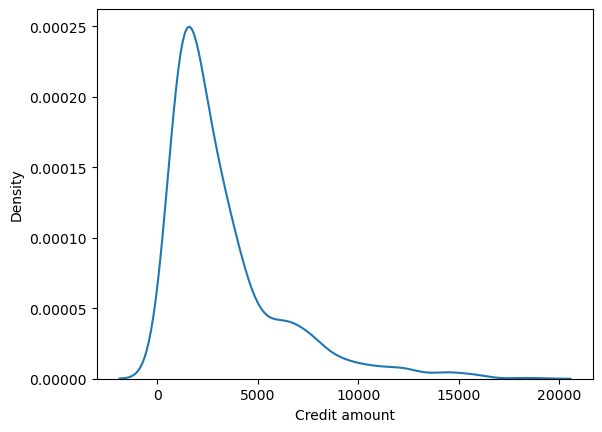

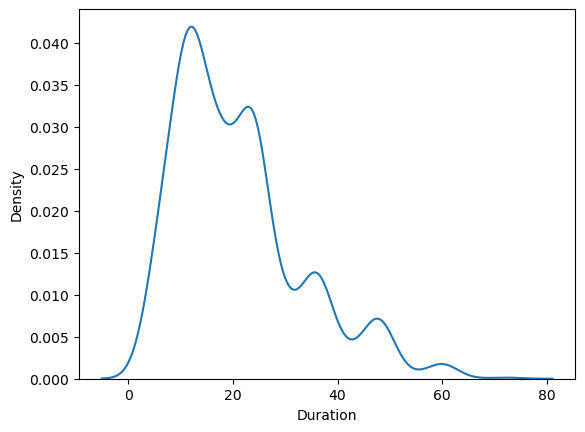

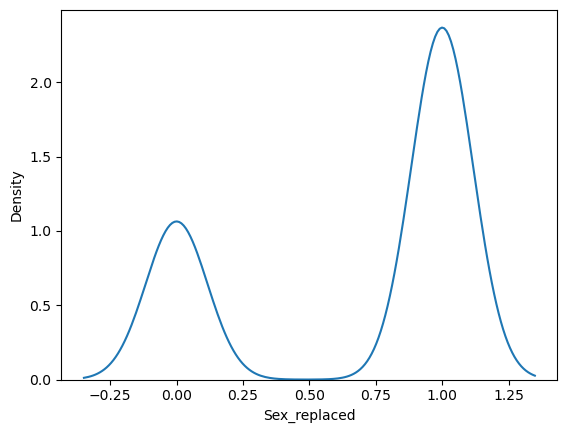

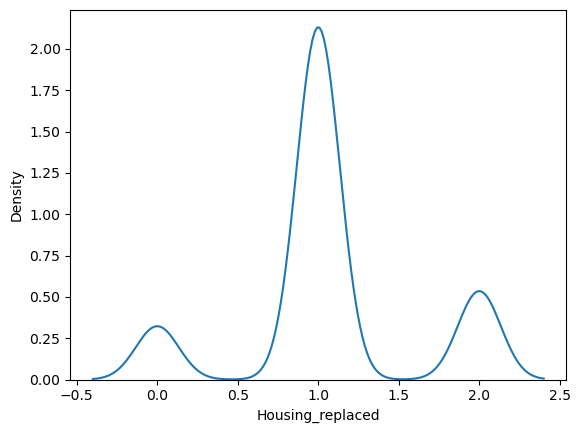

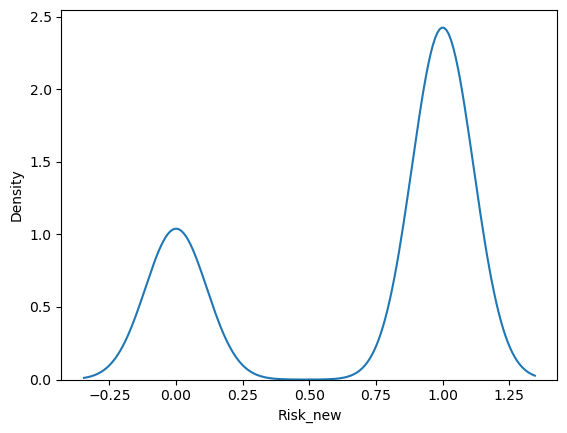

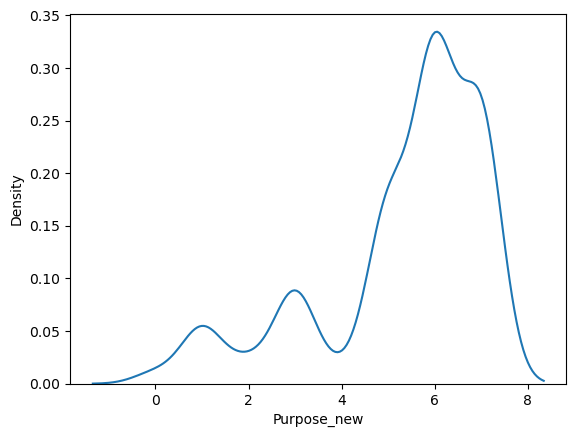

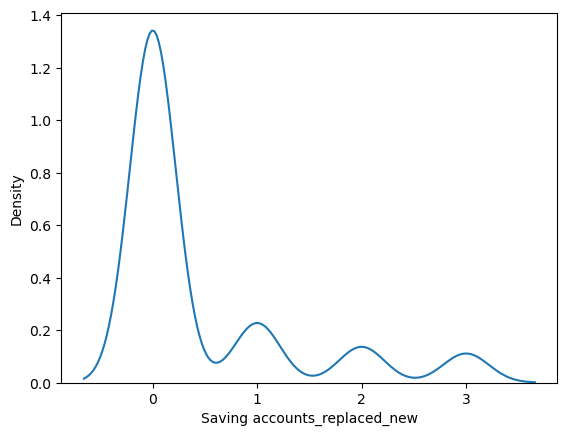

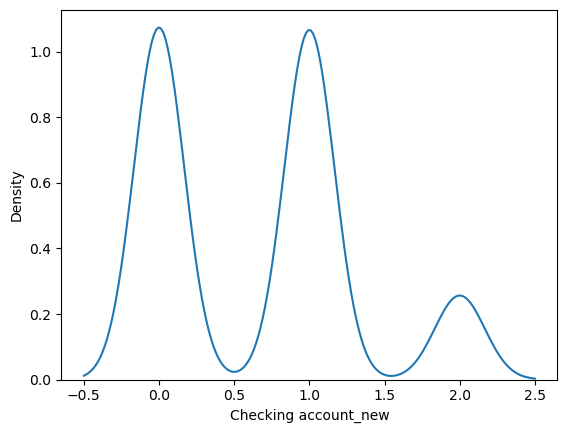

In [97]:
for i in data.columns:
    sns.kdeplot(data[i])
    plt.show()

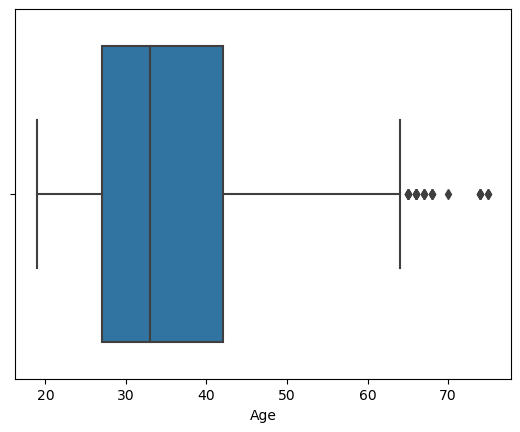

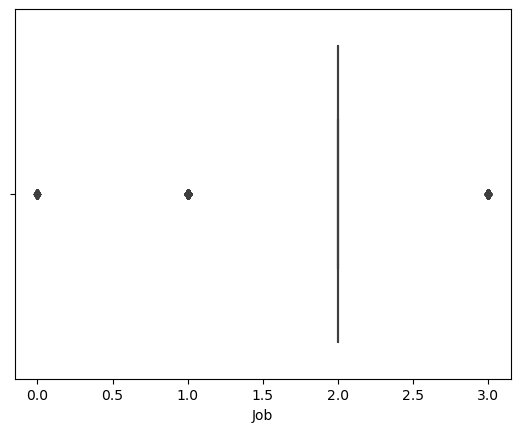

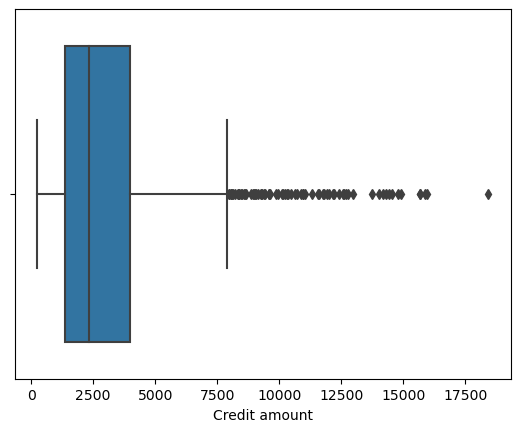

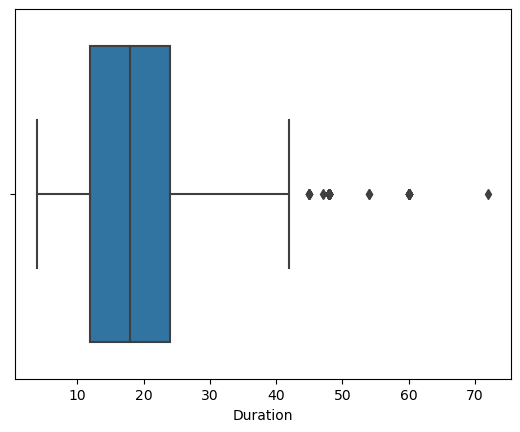

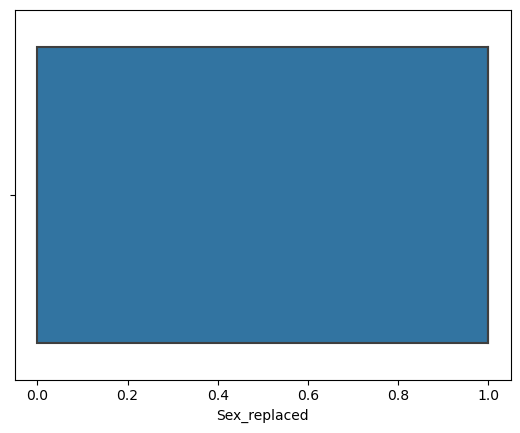

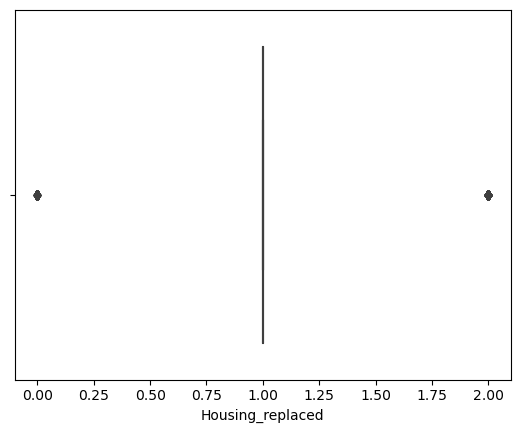

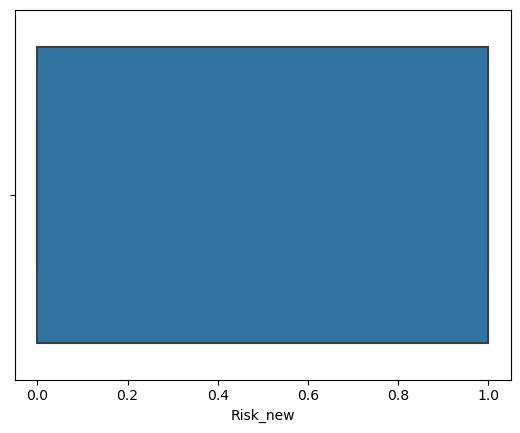

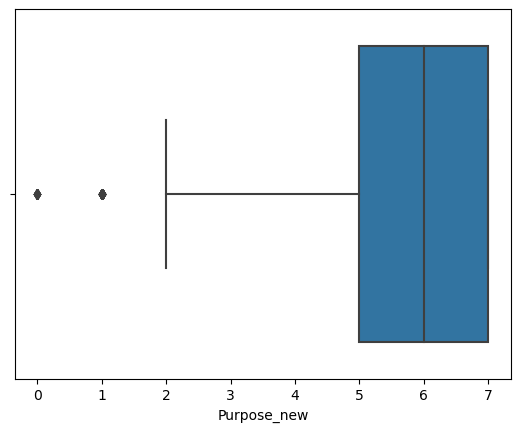

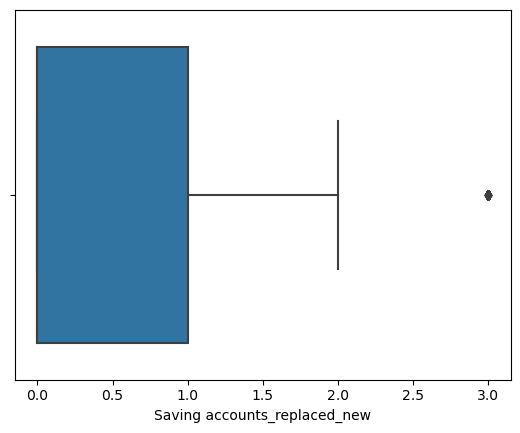

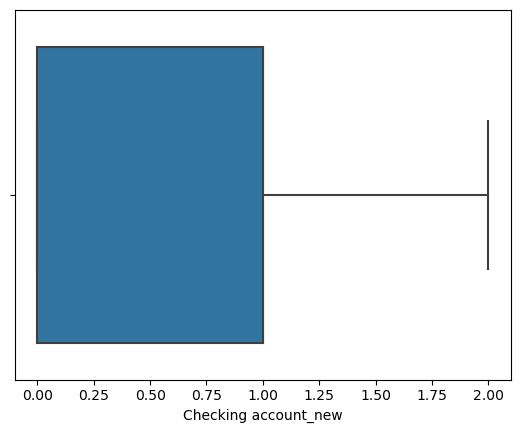

In [98]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:>

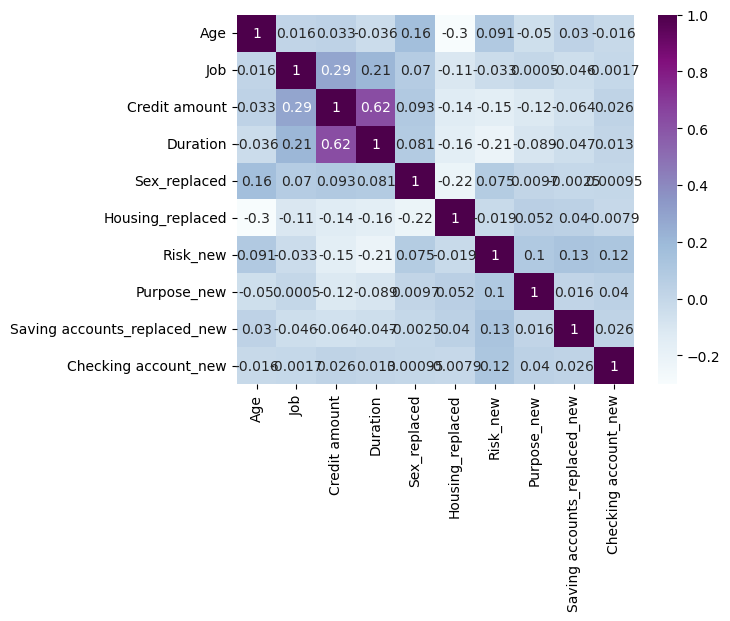

In [101]:
sns.heatmap(data.corr(),cmap="BuPu",annot=True)

# Feature Selection


In [102]:
from sklearn.feature_selection import VarianceThreshold # checking the variance

In [103]:
var=VarianceThreshold(threshold=0.0)

In [104]:
inde=data.drop(columns=["Risk_new"],axis=1)

In [105]:
inde

,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Purpose_new,Saving accounts_replaced_new,Checking account_new
0,67,2,1169,6,1.0,1.0,7,1.0,0.0
1,22,2,5951,48,0.0,1.0,7,0.0,1.0
2,49,1,2096,12,1.0,1.0,1,0.0,0.0
3,45,2,7882,42,1.0,0.0,5,0.0,0.0
4,53,2,4870,24,1.0,0.0,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0.0,1.0,5,0.0,1.0
996,40,3,3857,30,1.0,1.0,6,0.0,0.0
997,38,2,804,12,1.0,1.0,7,0.0,1.0
998,23,2,1845,45,1.0,0.0,7,0.0,0.0


In [106]:
var.fit(inde)

VarianceThreshold()

In [107]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [108]:
# now let's apply quasi constatnt removal technique

var=VarianceThreshold(threshold=0.1)
var.fit(inde)

VarianceThreshold(threshold=0.1)

In [109]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [110]:
# here all columns are  seems to be important , now apply duplicate removal technique
from feature_engine.selection import DropDuplicateFeatures


In [111]:
duplicates=DropDuplicateFeatures()

In [112]:
duplicates.fit(inde)

DropDuplicateFeatures()

In [119]:
duplicates.features_to_drop_

set()

In [114]:
# now let's apply correlation

from feature_engine.selection import DropCorrelatedFeatures

In [115]:
reg=DropCorrelatedFeatures(threshold=0.8,method="pearson")

In [116]:
reg.fit(inde)

DropCorrelatedFeatures()

In [117]:
reg.features_to_drop_

set()

In [118]:
# here after applying all these techniques , all columns seems to be important, so let's apply further process

# Data Balancing

In [148]:
data["Risk_new"].value_counts()

1    700
0    300
Name: Risk_new, dtype: int64

In [150]:
X=data.drop("Risk_new",axis=1)
y=data["Risk_new"]

In [151]:
from imblearn.over_sampling import RandomOverSampler


In [152]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [153]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Risk'] = y_resampled

In [154]:
df_resampled

,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Purpose_new,Saving accounts_replaced_new,Checking account_new,Risk
0,67,2,1169,6,1.0,1.0,7,1.0,0.0,1
1,22,2,5951,48,0.0,1.0,7,0.0,1.0,0
2,49,1,2096,12,1.0,1.0,1,0.0,0.0,1
3,45,2,7882,42,1.0,0.0,5,0.0,0.0,1
4,53,2,4870,24,1.0,0.0,6,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1395,28,2,1108,12,1.0,1.0,2,0.0,0.0,0
1396,23,2,1216,18,0.0,2.0,6,0.0,0.0,0
1397,25,1,4746,45,1.0,1.0,7,0.0,1.0,0
1398,41,2,2712,36,1.0,1.0,5,0.0,0.0,0


In [168]:
shuffled_df = df_resampled.sample(frac=1, random_state=42)

In [169]:
shuffled_df

,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Purpose_new,Saving accounts_replaced_new,Checking account_new,Risk
665,27,3,6314,24,1.0,1.0,0,0.0,0.0,1
624,65,2,2600,18,1.0,0.0,7,0.0,0.0,0
115,47,2,3578,48,1.0,1.0,7,0.0,0.0,1
478,39,1,1037,12,1.0,1.0,3,1.0,1.0,1
233,25,1,866,18,1.0,1.0,7,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
1095,23,1,1246,24,1.0,1.0,6,0.0,1.0,0
1130,47,1,1217,18,1.0,1.0,4,0.0,0.0,0
1294,21,2,3031,45,1.0,2.0,7,1.0,1.0,0
860,27,2,5804,24,1.0,1.0,6,3.0,0.0,1


In [170]:
X=shuffled_df.drop("Risk",axis=1)
y=shuffled_df["Risk"]

# Data Splitting

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [173]:
X_train

,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Purpose_new,Saving accounts_replaced_new,Checking account_new
1129,23,0,14555,6,1.0,1.0,6,1.0,1.0
832,29,2,11816,45,1.0,2.0,3,0.0,0.0
79,22,2,3832,30,1.0,1.0,5,0.0,1.0
244,35,1,3447,12,0.0,1.0,1,2.0,1.0
594,40,3,1358,24,1.0,1.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
351,29,2,959,9,0.0,1.0,5,0.0,1.0
942,31,2,929,24,1.0,1.0,5,3.0,0.0
98,36,2,2337,36,1.0,1.0,7,0.0,1.0
742,41,2,3160,21,1.0,1.0,7,0.0,2.0


In [174]:
y_train

1129    0
832     0
79      1
244     1
594     0
       ..
351     0
942     1
98      1
742     1
1028    0
Name: Risk, Length: 1120, dtype: int32

# Model Building
- KNN
- Logistic Regression
- Decision Tree
- Random Forest

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [1]:
# KNN
def knn(X_train,X_test,y_train,y_test):
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    print("Training Accuracy:",accuracy_score(y_train,y_train_pred))
    y_test_pred=knn.predict(X_test)
    print("Testing Accuracy:",accuracy_score(y_test,y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))
    

In [177]:
# LR
def lr(X_train,X_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    print("Training Accuracy:",accuracy_score(y_train,y_train_pred))
    y_test_pred=lr.predict(X_test)
    print("Testing Accuracy:",accuracy_score(y_test,y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))

In [178]:
# DT
def dt(X_train,X_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_train_pred=dt.predict(X_train)
    print("Training Accuracy:",accuracy_score(y_train,y_train_pred))
    y_test_pred=dt.predict(X_test)
    print("Testing Accuracy:",accuracy_score(y_test,y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))

In [180]:
# RF
def rf(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    y_train_pred=rf.predict(X_train)
    print("Training Accuracy:",accuracy_score(y_train,y_train_pred))
    y_test_pred=rf.predict(X_test)
    print("Testing Accuracy:",accuracy_score(y_test,y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))

In [181]:
# Calling all 
print("---------------KNN-------------------")
knn(X_train,X_test,y_train,y_test)
print("---------------LR--------------------")
lr(X_train,X_test,y_train,y_test)
print("---------------DT--------------------")
dt(X_train,X_test,y_train,y_test)
print("---------------RF--------------------")
rf(X_train,X_test,y_train,y_test)

---------------KNN-------------------
Training Accuracy: 0.7607142857142857
Testing Accuracy: 0.6642857142857143
Confusion Matrix:
[[105  36]
 [ 58  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       141
           1       0.69      0.58      0.63       139

    accuracy                           0.66       280
   macro avg       0.67      0.66      0.66       280
weighted avg       0.67      0.66      0.66       280

---------------LR--------------------
Training Accuracy: 0.6267857142857143
Testing Accuracy: 0.6892857142857143
Confusion Matrix:
[[104  37]
 [ 50  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       141
           1       0.71      0.64      0.67       139

    accuracy                           0.69       280
   macro avg       0.69      0.69      0.69       280
weighted avg       0.69      0.69      0.69    

In [182]:
# here we got best test accuracies for decision tree and random forest models

# Let's consider the model as Random forest classifier

In [183]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)


RandomForestClassifier()

In [185]:
y_test_pred=rf.predict(X_test)

In [186]:
accuracy_score(y_test,y_test_pred)

0.8535714285714285

In [184]:
import pickle

In [187]:
with open("model.pkl","wb") as f:
    pickle.dump(rf,f)

In [188]:
model=pickle.load(open("model.pkl","rb"))

In [189]:
model

RandomForestClassifier()

In [190]:
# now give inputs and predict

In [191]:
X

,Age,Job,Credit amount,Duration,Sex_replaced,Housing_replaced,Purpose_new,Saving accounts_replaced_new,Checking account_new
665,27,3,6314,24,1.0,1.0,0,0.0,0.0
624,65,2,2600,18,1.0,0.0,7,0.0,0.0
115,47,2,3578,48,1.0,1.0,7,0.0,0.0
478,39,1,1037,12,1.0,1.0,3,1.0,1.0
233,25,1,866,18,1.0,1.0,7,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1095,23,1,1246,24,1.0,1.0,6,0.0,1.0
1130,47,1,1217,18,1.0,1.0,4,0.0,0.0
1294,21,2,3031,45,1.0,2.0,7,1.0,1.0
860,27,2,5804,24,1.0,1.0,6,3.0,0.0


In [194]:
y

665     1
624     0
115     1
478     1
233     1
       ..
1095    0
1130    0
1294    0
860     1
1126    0
Name: Risk, Length: 1400, dtype: int32

In [193]:
rf.predict([[27,3,6314,24,1,1,0,0,0]])

array([1])

In [195]:
age=int(input("Enter Age:"))
job=int(input("Job type : numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled "))
credit=int(input("Credit Amount:"))
duration=int(input("Duration in months:"))
sex=int(input("Sex: Male - 1 , Female - 0"))
housing=int(input("Housing type : free - 0 , own - 1 , rent - 2 "))
purpose=int(input("Purpose of credit : vacation/others': 0, 'education': 1, 'repairs': 2, 'business': 3, 'domestic appliances': 4, 'furniture/equipment': 5, 'car': 6, 'radio/TV': 7 "))
savings=int(input("Savings account: 'moderate'-0, 'little'-1, 'quite rich'-2, 'rich'-3"))
checking=int(input("Checking account: 'little'-0, 'moderate'-1, 'rich' -2"))

Enter Age:27
Job type : numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled 3
Credit Amount:6314
Duration in months:24
Sex: Male - 1 , Female - 0)1
Housing type : free - 0 , own - 1 , rent - 2 1
Purpose of credit : vacation/others': 0, 'education': 1, 'repairs': 2, 'business': 3, 'domestic appliances': 4, 'furniture/equipment': 5, 'car': 6, 'radio/TV': 7 0
Savings account: 'moderate'-0, 'little'-1, 'quite rich'-2, 'rich'-30
Checking account: 'little'-0, 'moderate'-1, 'rich' -20


In [196]:
test=[age,job,credit,duration,sex,housing,purpose,savings,checking]

In [198]:
model.predict([test])

array([1])

In [199]:
if model.predict([test])==0:
    print("Bad")
else:
    print("Good")

Good
